### These are helper functions that get used later on but should be compiled first. 

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

def get_scores(y_pred):
    my_scores = []
    
    mse_values = ["MSE"]
    mse = mean_squared_error(y_test, y_pred)
    mse_dummy = mean_squared_error(y_test, y_pred_dummy)
    
    mse_values.append(mse)
    mse_values.append(mse_dummy)

    my_scores.append(mse_values)



    r2_values = ["R2"]
    r2 = r2_score(y_test, y_pred)
    r2_dummy = r2_score(y_test, y_pred_dummy)

    r2_values.append(r2)
    r2_values.append(r2_dummy)

    my_scores.append(r2_values)



    mae_values = ["MAE"]
    mae = mean_absolute_error(y_test, y_pred)
    mae_dummy = mean_absolute_error(y_test, y_pred_dummy)

    mae_values.append(mae)
    mae_values.append(mae_dummy)

    my_scores.append(mae_values)


    print(f"{'Evaluation method':<25} {'Score':<20} {'Dummy Score':<20} {'Ratio (Score/Dummy Score)':<20}")

    for item in my_scores:
        ratio = item[1]/item[2] if item[2] != 0 else 0
        print(f"{item[0]:<25} {item[1]:<20.3f} {item[2]:<20.3f} {ratio:<10.3f}")
        
        # print the ratio of the mse score over the mean value of y_test
    print(f"Ratio of mae over mean value of y: {(mae)/np.mean(y):.3f}")
    

# UC3M-MLBD (GitHub Repo Name)

**Authors**: João M. Carvalho (100521356), George Y. Fang (100521298)

Repo for UC3M's ML for Business Decision Making course

**NIA number**: 56

## Project 1: Predicting Solar Energy Production with scikit-learn

### Introduction
This assignment focuses on practicing machine learning methods and hyper-parameter tuning to determine the optimal model for a given dataset. Participants will engage in model selection, evaluation, and making predictions on unseen data.

The context of this assignment is the challenge of forecasting energy production from renewable sources, specifically wind and solar energy. Unlike traditional sources, the generation of solar and wind energy depends on weather conditions and must be accurately predicted 24 hours in advance to ensure a balanced electricity network. Accurate weather forecasting models, like GFS and ECMWF, play a crucial role in predicting variables related to these renewable energies.

We will use meteorological data forecasted by GFS to train a machine learning model that estimates solar energy production at a solar plant in Oklahoma. The available dataset contains 15 meteorological variables, each forecasted at 5 different times of the day and at 4 locations around the solar plant, leading to 300 input attributes in total. The dataset spans from 1994-2007, and the model’s performance will be evaluated using competition data from 2008-2009. The objective is to accurately predict the energy produced, with the last column of the dataset indicating the response variable, i.e., the energy production.

### Deliverables
* EDA
* Two Simple models (KNN and DecisionTreeRegressor) and training and evaluation process description
* At Least Two Advanced models (SVM, RandomForest, GradientBoosting) and training and evaluation process description
* One Final Model (Using Joblib) and training and evaluation process description
* One .csv file with final predictions

# Outline: **to be deleted**

* Importing the data (Joao)
* EDA 
  * histogram (Joao)
  * looking for categorical data (George)
  * dropping columns (George)
* Standardize/scaling (Joao)
* Model 1: KNN (Joao)
* Model 2: Decision Tree (George)
* Model 3: SVM (George)
* Model 4: Random Forest (Joao)
* Extra Model: Gradient Boosting (Joao)
* Comparing all models
* Final Model selection and export.


# Part 0: Importing the data

We start by importing the data with our NIA number which is 56. In order to do this, we need to import the libraries we will use.

In [26]:
import pandas as pd
import numpy as np

Now we can read the provided .pkl file with pandas and create a dataframe with the data. We will also look at df.head to make sure that everything was imported correctly.

In [27]:
ava = pd.read_pickle('data/ava_st1_ns4_56.pkl')
ava.head
comp = pd.read_pickle('data/comp_st1_ns4_56.pkl')
comp.head

<bound method NDFrame.head of        apcp_sf1_1  apcp_sf2_1 apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V4381    0.000000         0.0          1    0.000000    0.000000  269.677721   
V4382    0.000000         0.0          1    0.000000    0.000000  267.930467   
V4383    0.000000         0.0          1    0.000000    0.000000  262.911266   
V4384    0.000000         0.0          1    0.000000    0.000000  287.294791   
V4385    0.000000         0.0          1    0.000000    0.000000  281.137748   
...           ...         ...        ...         ...         ...         ...   
V5109    0.000000         0.0          1    0.001818    0.010000  220.382263   
V5110    0.046364         0.0          1    0.000000    0.000000  246.255685   
V5111    0.000000         0.0          1    0.000000    0.001818  220.178289   
V5112    0.000000         0.0          1    0.000000    0.000000  218.933680   
V5113    0.000000         0.0          1    0.000000    0.000000  240.577497   

       dl

For George's changes

#### Check for Missing Values

In [28]:
missing_values_count = max(ava.isnull().sum())
print(f"Number of missing values: {missing_values_count}")

Number of missing values: 0


#### Identify and Drop Constant Columns

In [29]:
# Shows all columns with only 1 unique value
constant_columns = [col for col in ava.columns if ava[col].nunique() < 2]
print(f"The Constant Columns Are: {constant_columns}")
print(f"Number of constant columns: {len(constant_columns)}")

# Drop the constant columns
print(f"Number of columns before dropping constant columns: {len(ava.columns)}")
ava.drop(labels=constant_columns, axis=1, inplace=True)
comp.drop(labels=constant_columns, axis=1, inplace=True)
print(f"Number of columns after dropping constant columns: {len(ava.columns)}")



The Constant Columns Are: ['apcp_sf3_1', 'apcp_sf1_2', 'apcp_sf2_2', 'uswrf_s1_2']
Number of constant columns: 4
Number of columns before dropping constant columns: 301
Number of columns after dropping constant columns: 297


#### Detect Categorical Columns

In [30]:
#Check for categorical columns
categorical_columns = ava.select_dtypes(include=['category']).columns
print(f"The Categorical Columns Are: {categorical_columns}")
print(f"Number of categorical columns: {len(categorical_columns)}")


The Categorical Columns Are: Index(['dswrf_s4_1', 'tmax_2m5_1', 'ulwrf_t4_1', 'uswrf_s3_1', 'uswrf_s4_1',
       'pwat_ea4_2', 'tmp_sfc5_2', 'ulwrf_s5_2', 'pres_ms2_3', 'pwat_ea4_3',
       'tcdc_ea2_3', 'tcolc_e1_3', 'tcolc_e5_3', 'tmp_sfc3_3', 'dswrf_s5_4',
       'tmin_2m4_4', 'tmp_2m_4_4'],
      dtype='object')
Number of categorical columns: 17


#### Visualization

After that initial cleanup, we can start looking at some visual representations of the data which will help us understand it better. We will start by looking at the histogram of the data to understand the distribution of energy values.

In [31]:
# First import the libraries we need
import matplotlib.pyplot as plt

# Now separate the data into X and y.
x = ava.drop('energy', axis=1)
y = ava['energy']

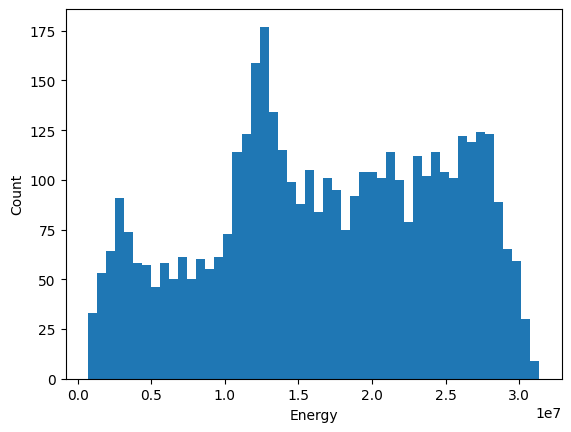

In [32]:
# To actually plot the histogram, we use matplotlib.pyplot.hist()
plt.hist(y, bins=50)
plt.xlabel('Energy')
plt.ylabel('Count')
plt.show()

As we can see in the histogram, our data appears to bi-modal. This will impact which evaluation model we use because we will need to make sure that error measurements are not skewed by the bi-modal distribution. 

Even though the distribution appears not to have any outliers, we will use the IQR method to detect and confirm this.

In [33]:
q1 = y.quantile(0.25)
q3 = y.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)

# Identify the number of outliers

print('number of outliers: ', len(y[y > upper_bound]) + len(y[y < lower_bound]))

number of outliers:  0


With no outliers detected, we can proceed with the creation of our models. 

## EDA Summary

Constant Columns: There are four constant column ['apcp_sf3_1', 'apcp_sf1_2', 'apcp_sf2_2', 'uswrf_s1_2']. These columns will be dropped from the dataset as they are redundant and would not contribute to the model accuracy. 

Missing Values: There are no missing values.

Categorical Variables: There are 17 categorical columns detected. This will be an issue for models like KNN and SVM because these algorithms are typically designed to work with numerical data. KNN relies on a distance metric to find the "nearest neighbors" in the feature space. Common distance metrics include Euclidean distance. For numerical features, distance calculations are straightforward. However, when dealing with categorical features, defining meaningful distances becomes more complex. SVMs often use the "kernel trick" to implicitly map data into a higher-dimensional space. This is more straightforward with numerical features. We will implement one-hot encoding to convert categorical features into numerical features.

## 1st Model: KNN 

Our 1st model is a K Nearest Neighbors model. This model is a non-parametric method used for classification and regression. It is a lazy learning algorithm that stores all instances corresponding to training data in n-dimensional space. When an unknown discrete data is received, it analyzes the closest k number of instances saved (nearest neighbors) and returns the most common class as the prediction and for real-valued data, it returns the mean of k nearest neighbors. 

We will start by splitting the data into training and testing sets. We will use 80% of the data for training and 20% for testing. We will also use the random_state parameter (NIA:56) to ensure that the data is split in the same way every time we run the code. This will allow us to compare the results of different models more easily.

Import the dependencies we'll need for the model.

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#### Standardize and scale the data for this kind of model

Given that we have some categorical data, we will need to use one-hot encoding to convert the categorical features into numerical features. This step is necessary because KNN relies on a distance metric to find the "nearest neighbors" in the feature space. Common distance metrics include Euclidean distance. For numerical features, distance calculations are straightforward. However, when dealing with categorical features, defining meaningful distances becomes more complex.


In [35]:
preprocessor = ColumnTransformer(
    transformers = [
        ('STscaler', StandardScaler(), make_column_selector(dtype_include=np.float64)),
        ('MMscaler', MinMaxScaler(), make_column_selector(dtype_include=np.int64)),
        ('OHE', OneHotEncoder(drop='first'), make_column_selector(dtype_include='category'))
    ],
    remainder = 'passthrough'
)

preprocessor.fit(x)

X = preprocessor.transform(x)




To dive deeper into our preprocessor, heres was each step does:

Standardization for Float64 Features (STscaler):

- StandardScaler is applied to features with data type float64. Standardization scales the features so that they have a mean of 0 and a standard deviation of 1. This is important for models that rely on distance metrics, such as K-Nearest Neighbors (KNN) and Support Vector Machines (SVM). Standardizing features ensures that each feature contributes equally to the distance computations.

Min-Max Scaling for Int64 Features (MMscaler):

- MinMaxScaler is applied to features with data type int64. Min-Max scaling transforms the features to a specific range (usually between 0 and 1). This is particularly useful for algorithms like SVMs, Neural Networks, and models that utilize gradient descent, as it prevents features with larger magnitudes from dominating the learning process.

One-Hot Encoding for Categorical Features (OHE):

- OneHotEncoder is applied to features with data type categorical. One-hot encoding transforms categorical features into numerical features. This is important because many machine learning algorithms cannot operate on categorical data directly. Instead, they require numerical features to perform computations. One-hot encoding is a common technique for converting categorical features into numerical features.

Passthrough for Remaining Features (remainder='passthrough'):

- The remainder parameter is set to 'passthrough', meaning that any features not explicitly transformed by the specified scalers will be kept in their original form. This is important to ensure that categorical features or those that don't require scaling are not modified.

## Now we can create the basic model without any hyperparameter tuning and see how it performs.

First let's split the data into training and testing sets. This will be the same split we use for the rest of the models. This holdout method is a simple way to evaluate a model by splitting the data into training and testing sets. The model is trained on the training set and then evaluated on the testing set. However, it has some drawbacks. For example, the model is only trained on a subset of the data, which can lead to overfitting. Additionally, the model is only evaluated on a subset of the data, which can lead to high variance in the evaluation metrics. We'll use cross-validation later to address these issues.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)


#### Import the model from sci-kit lean and we'll fit the data and predict the output.

In [37]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the model, leaving default values for all hyperparameters which is n= 5
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

# We'll now make our predictions
y_pred = knn.predict(X_test)

We'll make a DummyRegressor model to compare the results of our KNN model to a trivial model that just predicts the mean of the training data.

In [38]:
from sklearn.dummy import DummyRegressor

dummy_regressor = DummyRegressor(strategy='mean')
dummy_regressor.fit(X_train, y_train)
y_pred_dummy = dummy_regressor.predict(X_test)

### Now for metrics

First we import the dependencies we'll need for the metrics.

In [39]:

# Use that helper function from the top of the file to get scores
get_scores(y_pred)



Evaluation method         Score                Dummy Score          Ratio (Score/Dummy Score)
MSE                       12981489825913.064   61839876045693.438   0.210     
R2                        0.790                -0.003               -287.241  
MAE                       2416365.430          6744592.742          0.358     
Ratio of mae over mean value of y: 0.143


#### Residuals

We'll take a look at a plot of the residuals of the model predictions to see if there are any trends or patterns that the model is missing.

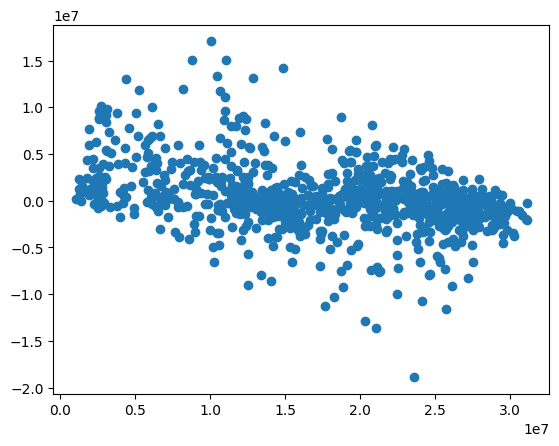

In [40]:
plt.scatter(y_test, y_pred - y_test)
plt.show()

We can see that the residuals are mostly homoscedastic, but there is a slight decreasing trend. This is likely due to the bi-modal distribution of the data and is leading to some over-prediction of the lower values and under-prediction of the higher values. Next we'll tune the hyperparameters of the model to see if we can improve the performance.

## Hyperparameter Tuning using k-fold Cross-Validation

In [41]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score

# Define the cross validation scheme. We will use KFold with 5 folds and no shuffling because the data is ordered.
cv = KFold(n_splits=5, shuffle=False)


scores = cross_val_score(knn, X, y, cv=cv, scoring='neg_mean_absolute_error')
print(scores)
print(f"{'Average MAE scores without HPO: '}", -scores.mean())
print(f"{'Average MAE scores without HPO as a percentage of the mean y value: '}", f"{(-scores.mean()/np.mean(y)*100):.2f}", '%')


# Define the search space

param_grid = {
    'n_neighbors': list(range(1, 50)),
}

# Define the grid search
better_knn = GridSearchCV(knn, param_grid, cv=cv, n_jobs=-1, scoring='neg_mean_absolute_error')



[-2531520.27671233 -2591816.2739726  -2204672.21643836 -2475971.28493151
 -2570046.20821918]
Average MAE scores without HPO:  2474805.252054794
Average MAE scores without HPO as a percentage of the mean y value:  14.67 %


#### Validating with MSE, R2, and MAE

Validating a machine learning model using multiple evaluation metrics, such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²), gives us a comprehensive understanding of the model's performance from different perspectives. Each metric shows different aspects of the model's predictive ability and suitability for specific applications. Here's why it's important to consider these metrics:

#### *Mean Squared Error (MSE):*
**Role:**

- MSE measures the average squared difference between the predicted and actual values.
  
**Importance:**
- Sensitivity to Outliers: MSE is sensitive to outliers due to the squaring of errors. It penalizes large errors more than smaller errors, making it effective in scenarios where large errors are critical.
- Optimization Objective: Many machine learning algorithms, especially regression models, are trained by minimizing MSE. Minimizing MSE during training often leads to models that perform well in terms of overall error.

#### *Mean Absolute Error (MAE):*
**Role:**
- MAE measures the average absolute difference between the predicted and actual values.
  
**Importance:**
- Robustness to Outliers: MAE is less sensitive to outliers than MSE since it doesn't involve squaring errors. It provides a more robust measure of the average error.
- Interpretability: MAE is easy to interpret, representing the average magnitude of errors. This makes it useful for understanding the typical prediction error.

#### *R-squared (R²):*

**Role:** 
- R² quantifies the proportion of the variance in the dependent variable that is predictable from the independent variables.

**Importance:**
- Model Fit: R² indicates how well the model's predictions match the variability in the actual data. A higher R² suggests a better fit.
- Comparisons: R² provides a standardized metric for model comparison. It ranges from 0 to 1, where 1 indicates a perfect fit. It's especially useful when comparing models with different scales of the dependent variable.

#### Primary Metric

Due to the bi-modal distribution of the data, we will use MAE as our primary metric for evaluating the model. MAE is less sensitive to large errors than MSE since it doesn't involve squaring errors. It provides a more robust measure of the average error when you consider the two peaks or "normal area" in the distribution. 


In [42]:

# Fit grid search
better_knn.fit(X_train, y_train) 
better_scores = cross_val_score(better_knn, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')

print(f"{'Scores from CV with HPO'}", better_scores)
print(f"{'Average MAE scores with HPO: '}", -better_scores.mean())
print(f"{'Average MAE scores with HPO as a percentage of the mean y value: '}", f"{(-better_scores.mean()/np.mean(y)*100):.2f}", '%')

best_n = better_knn.best_params_['n_neighbors']

print(f"{'The best number of neighbors when using negative mean absolute error scoring is: '}", best_n)
print(f"{'The best MAE score attained was: '}", -better_knn.best_score_)

print(f"{'HPO leads to a '}", f"{(1-(-better_scores.mean()/np.mean(y))/(-scores.mean()/np.mean(y)))*100:.2f}", '%', " improvement in MAE score over the model without HPO")

Scores from CV with HPO [-2261770.89586305 -2335000.17689016 -2288003.35261315 -2373923.14934709
 -2453240.01285714]
Average MAE scores with HPO:  2342387.517514118
Average MAE scores with HPO as a percentage of the mean y value:  13.88 %
The best number of neighbors when using negative mean absolute error scoring is:  14
The best MAE score attained was:  2330471.897291682
HPO leads to a  5.35 %  improvement in MAE score over the model without HPO


That was a lot, but what happened was, we used the GridSearchCV function to test different values for the hyperparameters of the model. Going from 1 to 50 neighbors and using the mean squared error as the scoring metric. We used 5-fold cross-validation to evaluate the performance of each model. This means that the data was split into 5 subsets, and each model was trained on 4 of the subsets and evaluated on the remaining subset. This process was repeated 5 times, so that each subset was used as the evaluation set once. The final score for each model was the average of the 5 evaluation scores. This is a more robust method of evaluating a model than the holdout method because it uses all of the data for training and evaluation. It also reduces the variance in the evaluation metrics because each model is evaluated on all of the data.

With this, we found that the ideal number of neighbors is 14, and this results in a mean absolute error of 2342387.517514118, which is just 13.88% of the mean energy production. This is a significant improvement over the dummy model, which had a mean absolute error of  61839876045693.438, and the non-tuned model, which had a mean absolute error of 2474805.252054794, which is 14.67% of the mean energy production.

### Now that we found the best n-neighbors, we can create a new model with that parameter and see how it performs.

In [43]:
# Instantiate the model with the best known parameters
final_knn = KNeighborsRegressor(n_neighbors=best_n)
final_knn.fit(X_train, y_train)
final_y_pred = final_knn.predict(X_test)
get_scores(final_y_pred)

Evaluation method         Score                Dummy Score          Ratio (Score/Dummy Score)
MSE                       12182122728685.301   61839876045693.438   0.197     
R2                        0.802                -0.003               -291.957  
MAE                       2393483.813          6744592.742          0.355     
Ratio of mae over mean value of y: 0.142


## Summary of KNN Model

First, we created a KNN model without HPO, and subsequently used GridSearchCrossValidation to find the best hyperparameters for the model. Creating a new model with this parameter, we were able to reduce the mean absolute error from 2474805.252054794 to 2393483.813, which is 14.2% of the mean energy production. 

That said, the final R2 score was 0.802, and the MAE ratio once the new model was trained with all of the X_train data, was 14.2% of the mean energy production. 

# 2nd Model Decision Tree Regressor Model

Our second model is the DecisionTreeRegressor. A Decision Tree Regressor is used for predicting continuous values. It works by recursively partitioning the data into subsets based on the values of input features, ultimately providing a tree-like structure of decisions. 

#### How it Works
First, you must split the data. The algorithm starts at the root node and selects the feature that best splits the data into subsets. The "best" split is determined by reducing the variance of the target variable within each subset. Next is recursive partitioning. This process is repeated for each subset, creating child nodes. This recursive partitioning continues until a stopping criterion is met, such as reaching a maximum depth or having a minimum number of samples in a node. The final nodes, called leaf nodes, contain the predicted continuous value. This value is often the mean or median of the target variable within that leaf.

#### Key Features
Interpretability:
- Decision trees are easy to interpret and visualize. The resulting tree structure can be understood and analyzed, making it a valuable tool for decision-making.

Non-linear Relationships:
- Decision trees can capture non-linear relationships between features and the target variable. They are capable of fitting complex patterns in the data.

Robust to Outliers:
- Decision trees are less sensitive to outliers compared to some other regression models. They partition the data based on relative ordering rather than absolute values.

### Preprocessing

As explained before, preprocessing is an important step in the machine learning pipeline as it helps enhance the performance and reliability of the models. Here, the ColumnTransformer is utilized to apply specific preprocessing techniques to different types of features, addressing their unique characteristics. Specifically, we are standardizing the data and scaling it for easier processing. For DecisionTreeRegressor, preprocessing is less important because it is inherently robust to the scale of features. 

In [44]:
preprocessor = ColumnTransformer(
    transformers = [
        ('STscaler', StandardScaler(), make_column_selector(dtype_include=np.float64)),
        ('MMscaler', MinMaxScaler(), make_column_selector(dtype_include=np.int64))
    ],
    remainder = 'passthrough'
)

preprocessor.fit(x)

X =  preprocessor.transform(x)



Importing the Decision Tree Regressor model from sklearn

In [45]:
from sklearn.tree import DecisionTreeRegressor

Now we create the DecisionTreeRegressor model, fit it to the training data and make a prediction on the test data that will be validated in subsequent cells. We'll also evaluate this model using the same metrics as the KNN model.

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

get_scores(y_pred)


## Here's a plot of the residuals of the decision tree model predictions to see if there are any trends or patterns that the model is missing.

plt.scatter(y_test, y_pred - y_test)
plt.show()

# K-Fold Cross Validation

As we learned in class, while classification trees use measures like entropy or Gini impurity to evaluate the quality of a split, regression trees use variance (or equivalently, mean squared error) as the criterion for splitting. The key idea is to minimize the variance within each node. When constructing a decision tree for regression, at each step, the algorithm considers all possible splits on all features and selects the split that minimizes the variance of the target variable within each resulting node.

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score

# Define the cross validation scheme.
cv = KFold(n_splits=5, shuffle=True, random_state=56)


scores = cross_val_score(tree, X, y, cv=cv, scoring='neg_mean_absolute_error')
print(scores)
print(f"{'Average MAE scores without HPO: '}", -scores.mean())
print(f"{'Average MAE scores without HPO as a percentage of the mean y value: '}", f"{(-scores.mean()/np.mean(y)*100):.2f}", '%')

param_grid defines the hyperparameter space that we want to search over to find the best combination of hyperparameters for our decision tree model, specifically these parameters:
'max_depth': Specifies the maximum depth of the decision tree. 
'min_samples_split': Specifies the minimum number of samples required to split an internal node. 
'max_features': Specifies the maximum number of features considered for splitting a node. It includes different options like using all features (None), the square root of the total features ('sqrt'), and the base-2 logarithm of the total features ('log2')

better_tree is a GridSearchCV object that performs a grid search over the specified hyperparameter space.

In [ ]:
# Define the search space

param_grid = {
    'max_depth': [1,2,3,4,5,6,7,8,9,11,13,15],
    'min_samples_split': [2, 5, 10, 20], 
    'max_features': [None, 'sqrt', 'log2']
}

better_tree = GridSearchCV(tree, param_grid, cv=cv, n_jobs=-1, scoring='neg_mean_absolute_error', refit=True)


better_tree.fit(X_train, y_train) 
better_scores = cross_val_score(better_tree, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')

print(f"{'Scores from CV with HPO'}", better_scores)
print(f"{'Average MAE scores with HPO: '}", -better_scores.mean())
print(f"{'Average MAE scores with HPO as a percentage of the mean y value: '}", f"{(-better_scores.mean()/np.mean(y)*100):.2f}", '%')

In [ ]:
print(f"{'The best parameters when using negative mean absolute error scoring is: '}", better_tree.best_params_)
print(f"{'The best MAE score attained was: '}", -better_tree.best_score_)

print(f"{'HPO leads to a '}", f"{(1-(-better_scores.mean()/np.mean(y))/(-scores.mean()/np.mean(y)))*100:.2f}", '%', " improvement in MAE score over the model without HPO")


### Now let's use this new model to predict values of the test data and evaluate the model.

In [ ]:
better_predictions = better_tree.predict(X_test)

get_scores(better_predictions)

#### Summary of Results

From the results we can see the r2 value of _________ and the mean absolute error of _________. This is a significant improvement from the baseline model which had an r2 value of _________ and a mean absolute error of _________. Compared to KNN, the model performes ___(better/worse)__ in terms of r2 and mean absolute error.